In [1]:
import  pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('Customer.csv')

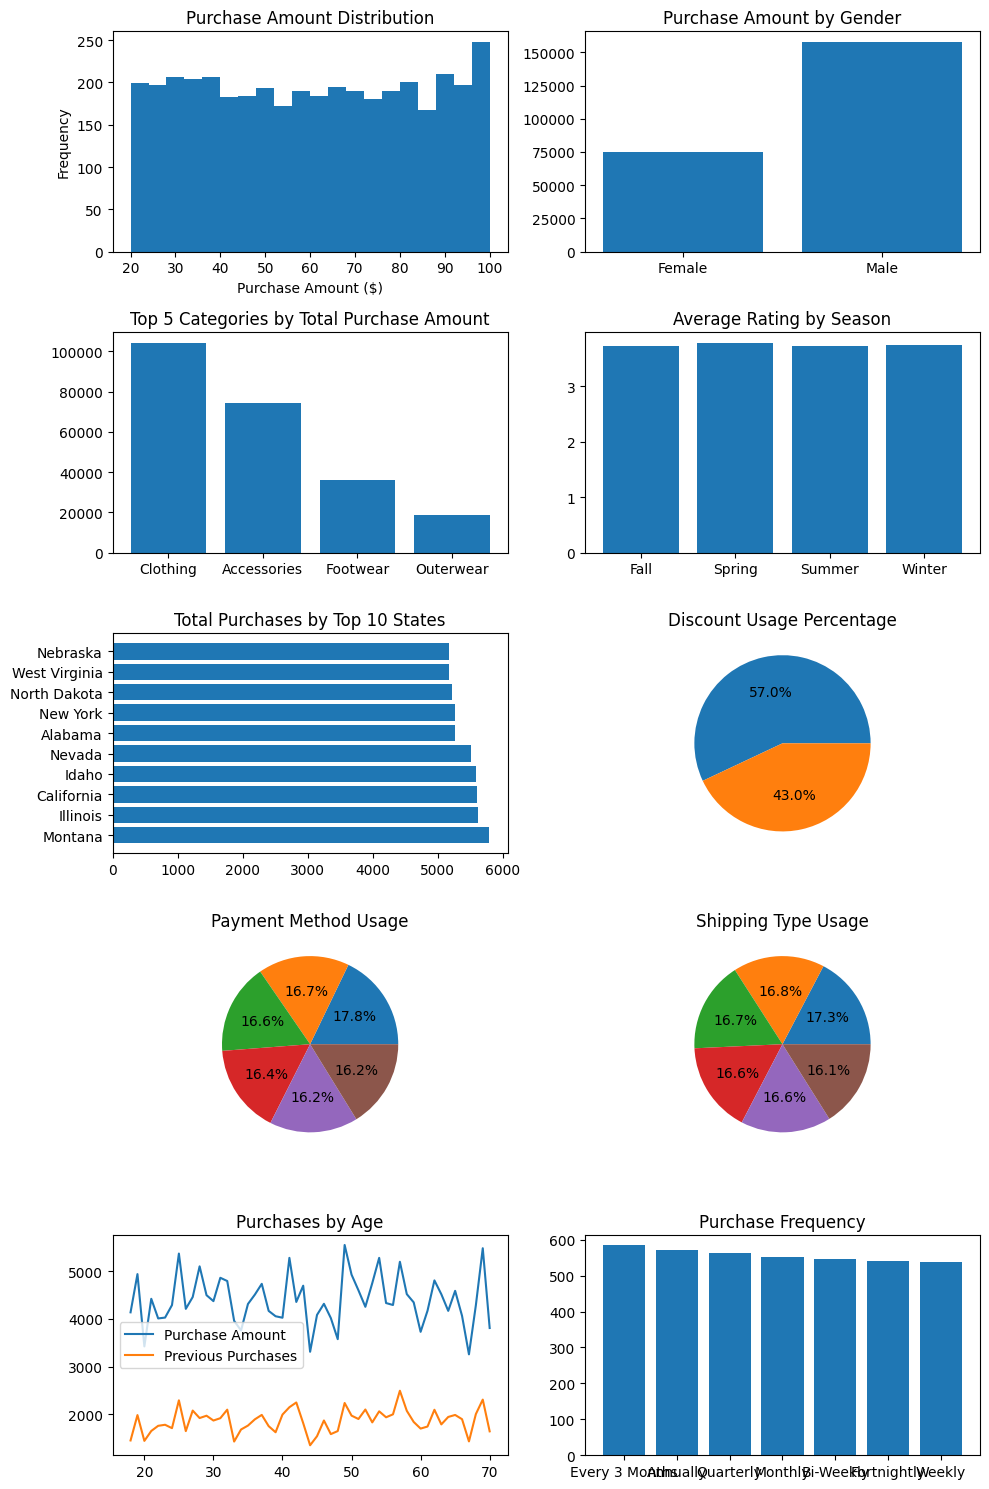

In [3]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(5, 2, figsize=(10, 15))

# Purchase amount distribution  
axs[0, 0].hist(df['Purchase Amount (USD)'], bins=20)
axs[0, 0].set_xlabel('Purchase Amount ($)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Purchase Amount Distribution')

# Purchase amount by gender
axs[0, 1].bar(df.groupby('Gender')['Purchase Amount (USD)'].sum().index, df.groupby('Gender')['Purchase Amount (USD)'].sum())
axs[0, 1].set_title('Purchase Amount by Gender')

# Top categories 
top_cats = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)
axs[1, 0].bar(top_cats.index, top_cats)  
axs[1, 0].set_title('Top 5 Categories by Total Purchase Amount')

# Average rating by season
axs[1, 1].bar(df.groupby('Season')['Review Rating'].mean().index, df.groupby('Season')['Review Rating'].mean())
axs[1, 1].set_title('Average Rating by Season')

# Purchases by state  
top_states = df.groupby('Location')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(10)
axs[2, 0].barh(top_states.index, top_states)
axs[2, 0].set_title('Total Purchases by Top 10 States')

# Discount usage
discount_use = df['Discount Applied'].value_counts(normalize=True) * 100 
axs[2, 1].pie(discount_use, autopct='%1.1f%%')
axs[2, 1].set_title('Discount Usage Percentage')

# Payment method usage
payment_methods = df['Payment Method'].value_counts(normalize=True) * 100
axs[3, 0].pie(payment_methods, autopct='%1.1f%%') 
axs[3, 0].set_title('Payment Method Usage')

# Shipping type usage
shipping_types = df['Shipping Type'].value_counts(normalize=True) * 100
axs[3, 1].pie(shipping_types, autopct='%1.1f%%')
axs[3, 1].set_title('Shipping Type Usage')

# Purchases by age
axs[4, 0].plot(df.groupby('Age')[['Purchase Amount (USD)', 'Previous Purchases']].sum())
axs[4, 0].set_title('Purchases by Age')
axs[4, 0].legend(['Purchase Amount','Previous Purchases'])

# Purchase frequency 
freq = df['Frequency of Purchases'].value_counts()
axs[4, 1].bar(freq.index, freq)
axs[4, 1].set_title('Purchase Frequency')

plt.tight_layout()
plt.show()

/var/folders/30/hh09bz3d3js8y5gnp90fyfh40000gn/T/ipykernel_19253/2649124140.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  discount_time = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Discount Applied'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)
/var/folders/30/hh09bz3d3js8y5gnp90fyfh40000gn/T/ipykernel_19253/2649124140.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cat_time = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)


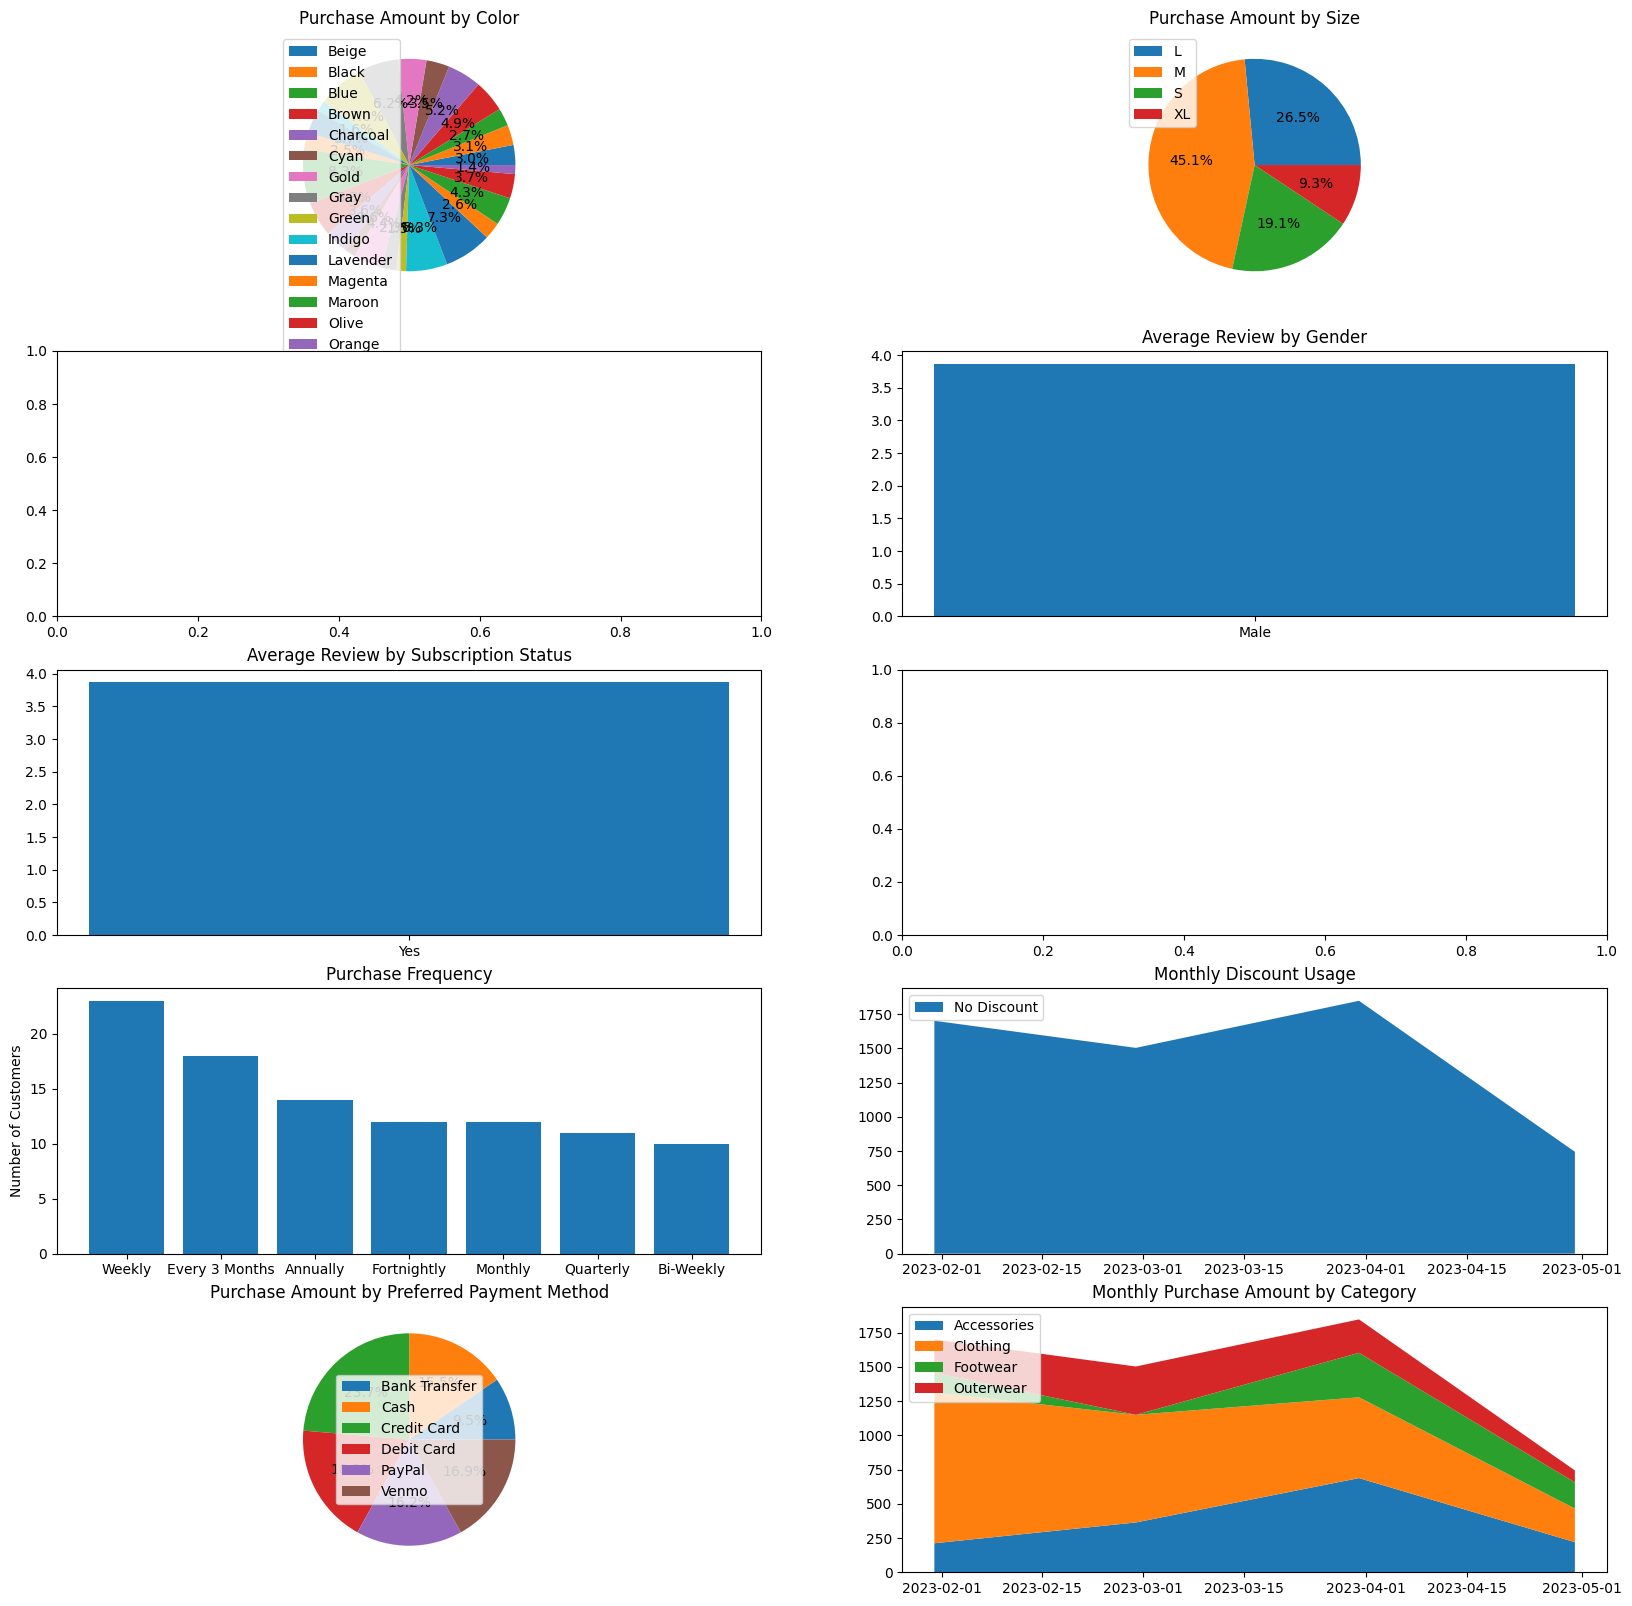

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('avb.csv')
fig, axs = plt.subplots(5, 2, figsize=(20, 20))

# Purchase amount by color
colors = df.groupby('Color')['Purchase Amount (USD)'].sum()
axs[0,0].pie(colors, autopct='%1.1f%%')
axs[0,0].legend(colors.index, loc="best")
axs[0,0].set_title('Purchase Amount by Color')

# Purchase amount by size 
sizes = df.groupby('Size')['Purchase Amount (USD)'].sum()
axs[0,1].pie(sizes, autopct='%1.1f%%')
axs[0,1].legend(sizes.index, loc="best")
axs[0,1].set_title('Purchase Amount by Size')


# Reviews by gender
gen_rating = df.groupby('Gender')['Review Rating'].mean()
axs[1,1].bar(gen_rating.index, gen_rating) 
axs[1,1].set_title('Average Review by Gender')

# Subscription status reviews
sub_reviews = df.groupby('Subscription Status')['Review Rating'].mean()
axs[2,0].bar(sub_reviews.index, sub_reviews)
axs[2,0].set_title('Average Review by Subscription Status')  

# Shipping type by gender

# Purchase frequency
freq = df['Frequency of Purchases'].value_counts()
axs[3,0].bar(freq.index, freq)
axs[3,0].set_title('Purchase Frequency')
axs[3,0].set_ylabel('Number of Customers')

# Discount usage over time 
df['Order Date'] = pd.date_range('2023-01-01', periods=len(df), freq='D')  
discount_time = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Discount Applied'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)
axs[3,1].stackplot(discount_time.index, discount_time.values.T, labels=['No Discount', 'Discount Applied'])  
axs[3,1].legend(loc='upper left')
axs[3,1].set_title('Monthly Discount Usage')

# Purchase amount by preferred payment method
preferred = df.groupby('Preferred Payment Method')['Purchase Amount (USD)'].sum()
axs[4,0].pie(preferred, autopct='%1.1f%%')  
axs[4,0].set_title('Purchase Amount by Preferred Payment Method') 
axs[4,0].legend(preferred.index, loc="best")

# Purchase amount by category over time
cat_time = df.groupby([pd.Grouper(key='Order Date', freq='M'), 'Category'])['Purchase Amount (USD)'].sum().unstack(fill_value=0)
axs[4,1].stackplot(cat_time.index, cat_time.values.T, labels=cat_time.columns)
axs[4,1].legend(loc='upper left')
axs[4,1].set_title('Monthly Purchase Amount by Category')

# plt.tight_layout()
plt.show()

In [5]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
Order Date                  0
dtype: int64

In [6]:
count = df['Subscription Status'].value_counts()
count

Subscription Status
Yes    100
Name: count, dtype: int64

In [7]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

categorical_columns

['Gender',
 'Item Purchased',
 'Category',
 'Location',
 'Size',
 'Color',
 'Season',
 'Subscription Status',
 'Payment Method',
 'Shipping Type',
 'Discount Applied',
 'Promo Code Used',
 'Preferred Payment Method',
 'Frequency of Purchases']

In [8]:
one_hot = pd.get_dummies(df, columns= categorical_columns)

In [9]:






num_cols = df.select_dtypes(exclude=['object']).columns.tolist() # these are the numerical columns


num_cols.remove('Customer ID') # removing the customer id from the numerical columns



In [10]:

sc = StandardScaler()
sc.fit(one_hot[num_cols])


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.DateTime64DType'>)